In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [31]:
# 目的変数[SalePrice]の基本統計量を表示
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <BarContainer object of 50 artists>)

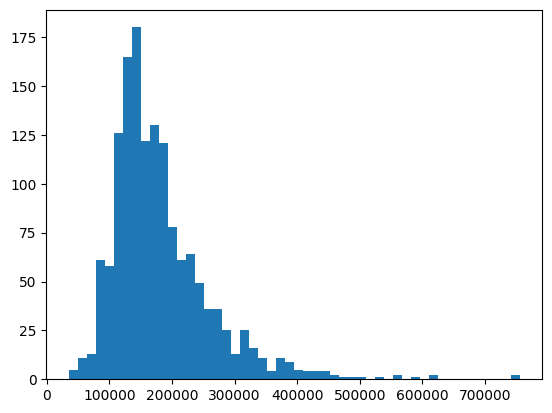

In [32]:
# 目的変数[SalePrice]を可視化
plt.hist(train['SalePrice'], bins=50)

In [33]:
# 歪度とは左右の偏りで、正の値では左に歪み、負の値では右に歪む。左右対称の分布では０になる。
# 尖度とは上下の偏りで、正の値では正規分布より尖った分布、負の値では扁平な分布になる。正規分布の場合は０になる。
skewness = train['SalePrice'].skew()
kurtosis = train['SalePrice'].kurtosis()
print(f'歪度 (Skewness): {skewness:.2f}')
print(f'尖度 (Kurtosis): {kurtosis:.2f}')

歪度 (Skewness): 1.88
尖度 (Kurtosis): 6.54


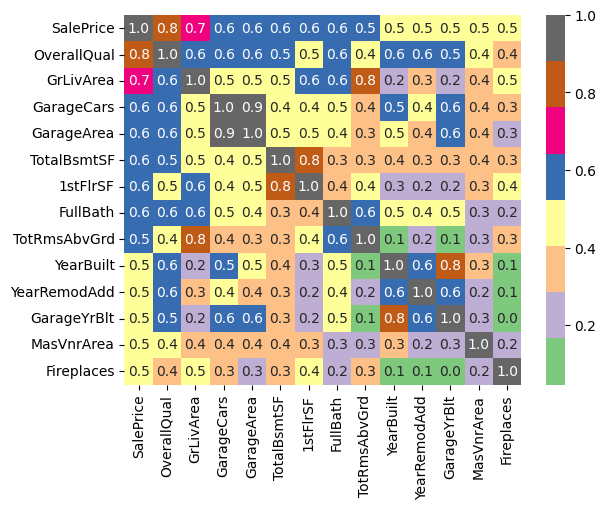

In [34]:
# trainから"Object"を削除する
train_not_object = train.select_dtypes(exclude='object')
# 相関係数の絶対値が0.4以上だと相関関係が強い
threshold = 0.4
highscore = train_not_object.corr()['SalePrice'][abs(train_not_object.corr()['SalePrice']) >= threshold].sort_values(ascending=False).index
sns.heatmap(train_not_object[highscore].corr(), cmap='Accent', annot=True, fmt='.1f', annot_kws={'fontsize': 10})
plt.show()

In [35]:
# trainの欠損値処理
train.isnull().sum()[train.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [36]:
# trainの欠損値を 'None'に置換する
train['Alley'] = train['Alley'].fillna('None')
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna('None')
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
train['GarageType'] = train['GarageType'].fillna('None')
train['GarageFinish'] = train['GarageFinish'].fillna('None')
train['GarageQual'] = train['GarageQual'].fillna('None')
train['GarageCond'] = train['GarageCond'].fillna('None')
train['PoolQC'] = train['PoolQC'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['MiscFeature'] = train['MiscFeature'].fillna('None')

In [37]:
# trainの欠損値を０に置換する
train['MasVnrArea'] = train['MasVnrArea'].fillna('0')
train['GarageYrBlt'] = train['GarageYrBlt'].fillna('0')

In [38]:
# trainの欠損値を最頻値に置換する
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [39]:
# trainの欠損値を平均値に置換する
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [40]:
# 削除する
train = train.drop('Utilities', axis=1)

In [261]:
# 削除する
train = train.drop('Id', axis=1)

In [49]:
# trainの欠損値が無くなっているかを確認
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

In [42]:
# testの欠損値を確認
test.isnull().sum()[test.isnull().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [43]:
# testの欠損値を 'None'に置換する
test['Alley'] = test['Alley'].fillna('None')
test['BsmtQual'] = test['BsmtQual'].fillna('None')
test['BsmtCond'] = test['BsmtCond'].fillna('None')
test['BsmtExposure'] = test['BsmtExposure'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')
test['GarageType'] = test['GarageType'].fillna('None')
test['GarageFinish'] = test['GarageFinish'].fillna('None')
test['GarageQual'] = test['GarageQual'].fillna('None')
test['GarageCond'] = test['GarageCond'].fillna('None')
test['PoolQC'] = test['PoolQC'].fillna('None')
test['Fence'] = test['Fence'].fillna('None')
test['MiscFeature'] = test['MiscFeature'].fillna('None')

In [44]:
# testの欠損値を０に置換する
test['MasVnrArea'] = test['MasVnrArea'].fillna('0')
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna('0')
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna('0')
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna('0')
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna('0')
test['BsmtFullBath'] = test['BsmtFullBath'].fillna('0')
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna('0')
test['GarageYrBlt'] = test['GarageYrBlt'].fillna('0')
test['GarageCars'] = test['GarageCars'].fillna('0')
test['GarageArea'] = test['GarageArea'].fillna('0')

In [45]:
# testの欠損値を最頻値に置換する
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

In [46]:
# testの欠損値を平均値に置換する
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())

In [47]:
# 削除する
test = test.drop('Utilities', axis=1)

In [50]:
# testの欠損値が無くなっているかを確認
test.isnull().sum()[test.isnull().sum() > 0]

Series([], dtype: int64)

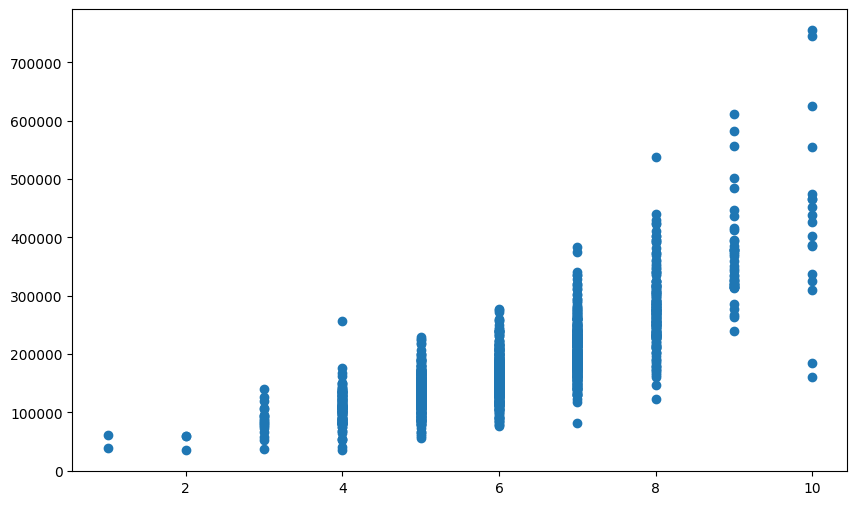

In [85]:
# "OverallQuat"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['OverallQual'], train['SalePrice'])
plt.show()

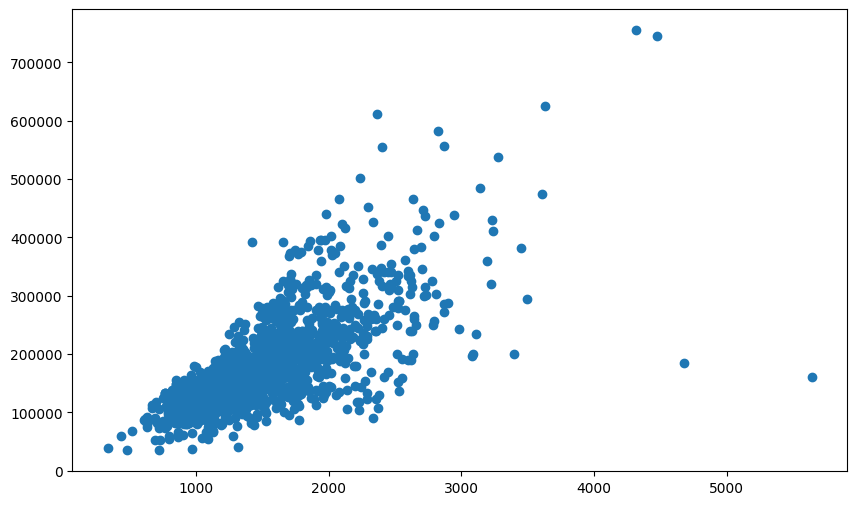

In [86]:
# "GrLivArea"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.show()

In [92]:
# "GrLivArea"4000以上, "SalePrice"700000以上を外れ値として削除
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] > 700000)].index)

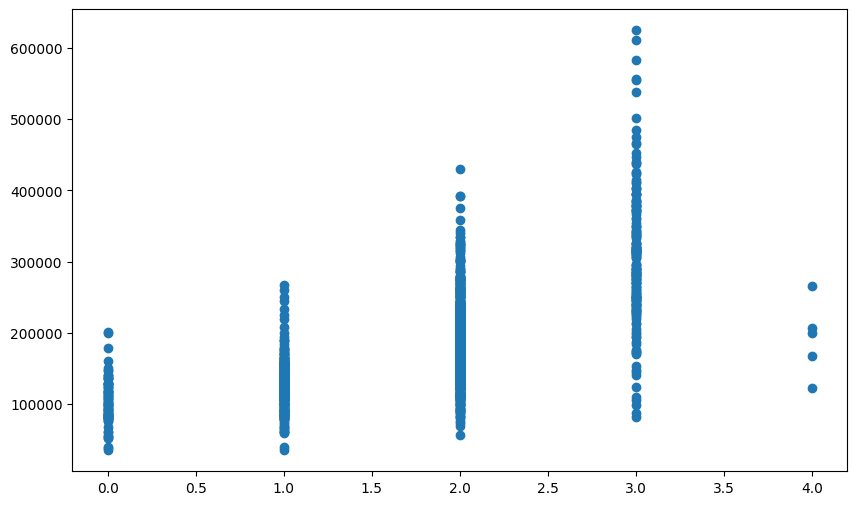

In [94]:
# "GarageCars"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['GarageCars'], train['SalePrice'])
plt.show()

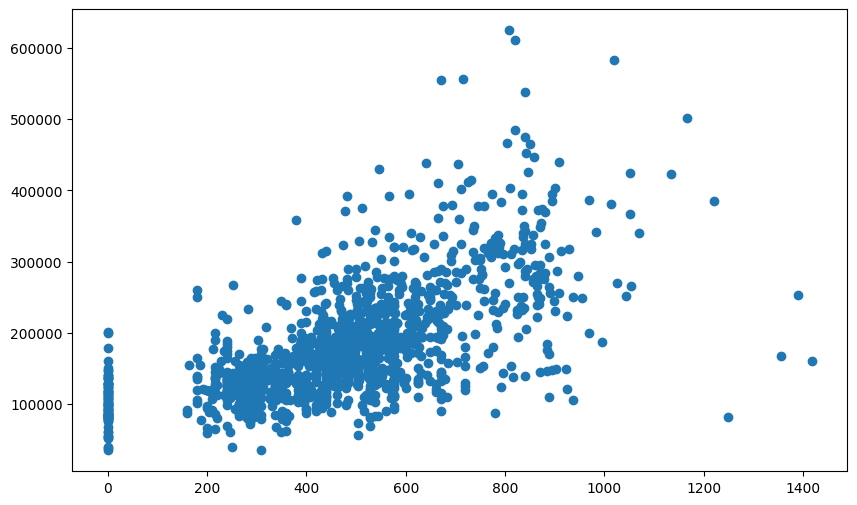

In [96]:
# "GarageArea"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['GarageArea'], train['SalePrice'])
plt.show()

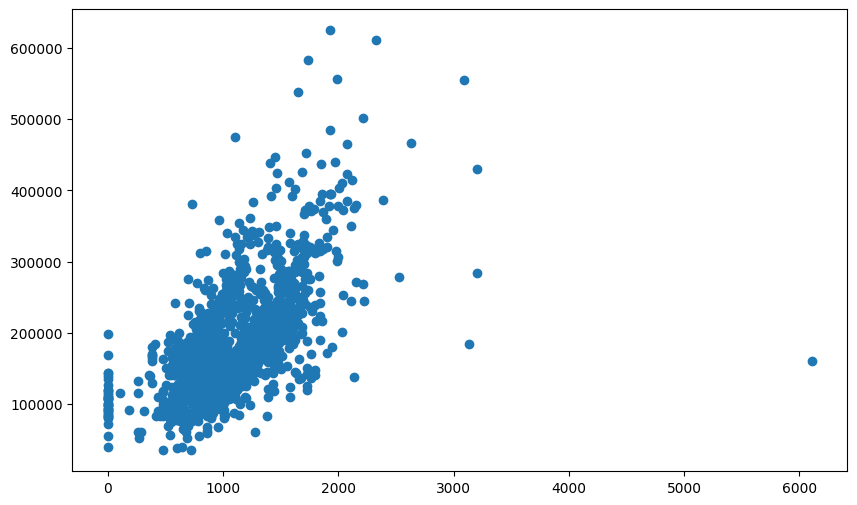

In [97]:
# "TotalBsmtSF"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.show()

In [98]:
# "TotalBsmtSF"4000以上, "SalePrice"200000以下を外れ値として削除
train = train.drop(train[(train['TotalBsmtSF'] > 4000) & (train['SalePrice'] < 200000)].index)

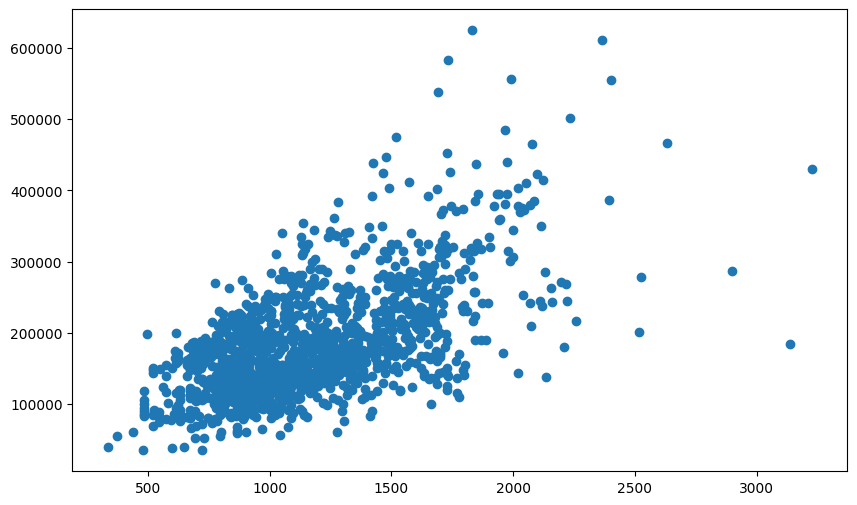

In [99]:
# "1stFlrSF"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['1stFlrSF'], train['SalePrice'])
plt.show()

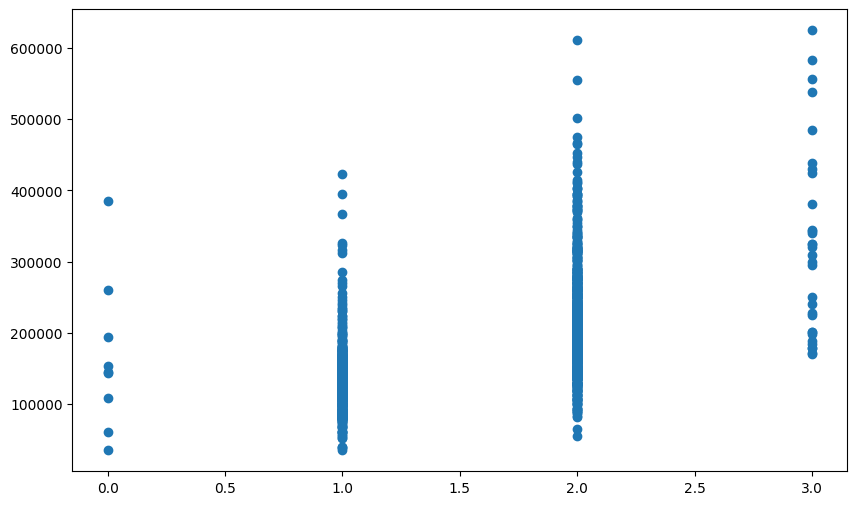

In [100]:
# "Fi;;Bath"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['FullBath'], train['SalePrice'])
plt.show()

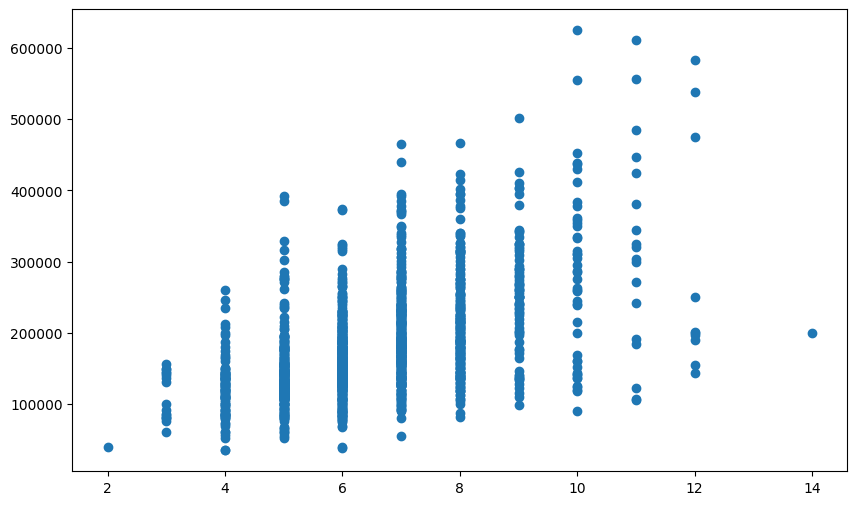

In [101]:
# "TotRmsAbvGrd"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['TotRmsAbvGrd'], train['SalePrice'])
plt.show()

In [102]:
# "TotRmsAbvGrd"12以上, "SalePrice"300000以下を外れ値として削除
train = train.drop(train[(train['TotRmsAbvGrd'] > 12) & (train['SalePrice'] < 300000)].index)

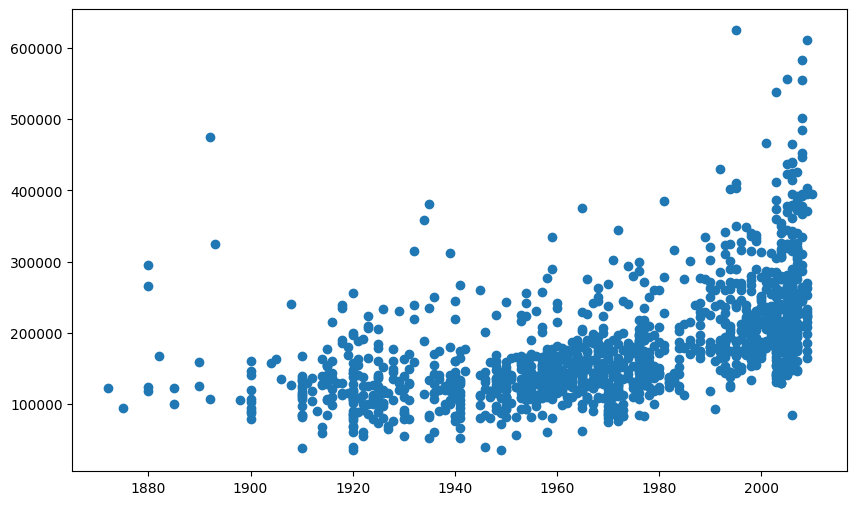

In [103]:
# "yearBuilt"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['YearBuilt'], train['SalePrice'])
plt.show()

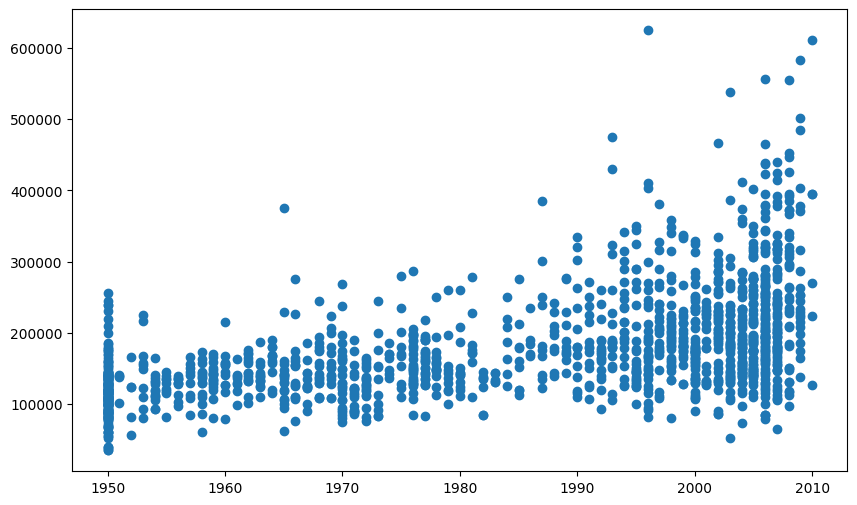

In [105]:
# "YearRemodAdd"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['YearRemodAdd'], train['SalePrice'])
plt.show()

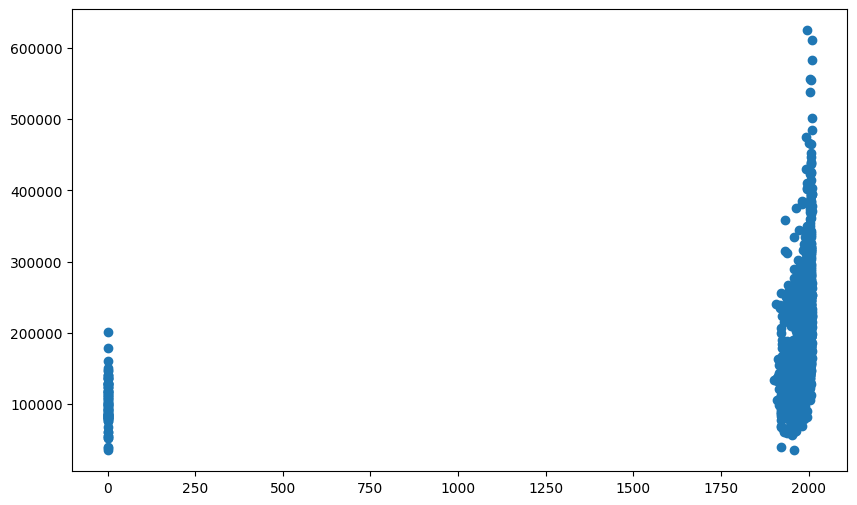

In [106]:
# "GarageYrBlt"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['GarageYrBlt'], train['SalePrice'])
plt.show()

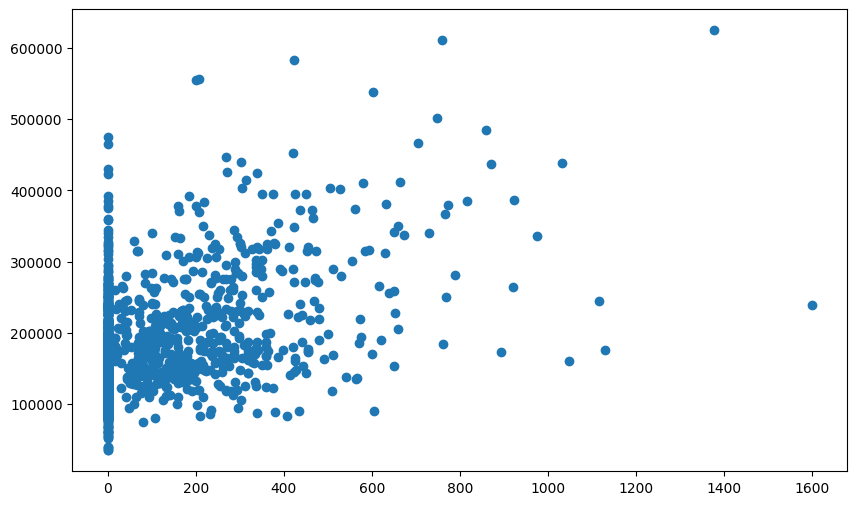

In [107]:
# "MasVnrArea"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['MasVnrArea'], train['SalePrice'])
plt.show()

In [110]:
# [エラー対応必要]"MasVnrArea"1200以上, "SalePrice"300000以下を外れ値として削除

train = train.drop(train[(train['MasVnrArea'] > 1200) & (train['SalePrice'] < 300000)].index)

TypeError: '>' not supported between instances of 'str' and 'int'

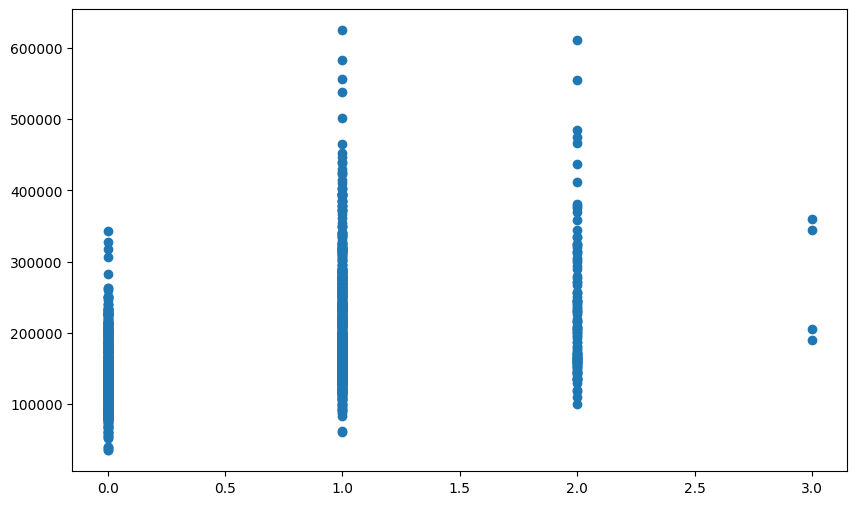

In [111]:
# "Fireplaces"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['Fireplaces'], train['SalePrice'])
plt.show()

(array([  5.,   6.,  11.,  24.,  50.,  45.,  93., 123., 161., 117., 106.,
        111., 102.,  78.,  48.,  54.,  55.,  39.,  32.,  31.,  29.,  19.,
         12.,  20.,  16.,  11.,   6.,   4.,   7.,   9.,   6.,   5.,   2.,
          3.,   4.,   1.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,
          2.,   0.,   1.,   0.,   1.,   1.]),
 array([ 34900.,  46702.,  58504.,  70306.,  82108.,  93910., 105712.,
        117514., 129316., 141118., 152920., 164722., 176524., 188326.,
        200128., 211930., 223732., 235534., 247336., 259138., 270940.,
        282742., 294544., 306346., 318148., 329950., 341752., 353554.,
        365356., 377158., 388960., 400762., 412564., 424366., 436168.,
        447970., 459772., 471574., 483376., 495178., 506980., 518782.,
        530584., 542386., 554188., 565990., 577792., 589594., 601396.,
        613198., 625000.]),
 <BarContainer object of 50 artists>)

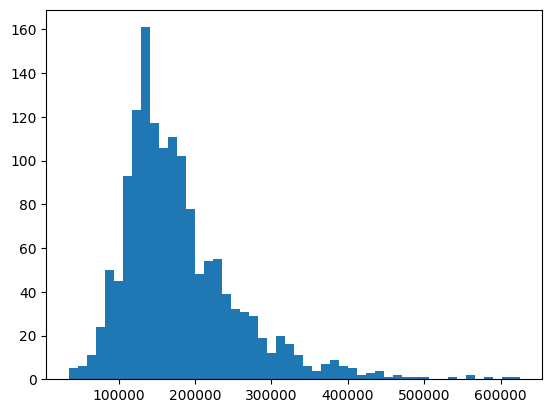

In [112]:
# 目的変数[SalePrice]を可視化
plt.hist(train['SalePrice'], bins=50)

In [113]:
# 歪度(前回:1.88),　尖度(前回:6.54)が改善したか確認
skewness = train['SalePrice'].skew()
kurtosis = train['SalePrice'].kurtosis()
print(f'歪度 (Skewness): {skewness:.2f}')
print(f'尖度 (Kurtosis): {kurtosis:.2f}')

歪度 (Skewness): 1.57
尖度 (Kurtosis): 3.89


In [117]:
# 文字列の数値化[MSZoning]
train['MSZoning'].value_counts()

MSZoning
RL         1148
RM          218
FV           65
RH           15
C (all)      10
Name: count, dtype: int64

In [232]:
train['MSZoning'] = train['MSZoning'].replace({'RL': 0 ,'RM': 1, 'FV': 2, 'RH': 3, 'C (all)': 4})
train['MSZoning'].value_counts()

MSZoning
0    1148
1     218
2      65
3      15
4      10
Name: count, dtype: int64

In [123]:
# 文字列の数値化[Street]
train['Street'].value_counts()

Street
Pave    1450
Grvl       6
Name: count, dtype: int64

In [125]:
train['Street'] = train['Street'].replace({'Pave': 0 ,'Grvl': 1})
train['Street'].value_counts()

Street
0    1450
1       6
Name: count, dtype: int64

In [127]:
# 文字列の数値化[Alley]
train['Alley'].value_counts()

Alley
None    1366
Grvl      50
Pave      40
Name: count, dtype: int64

In [128]:
train['Alley'] = train['Alley'].replace({'None': 0 ,'Grvl': 1, 'Pave': 2})
train['Alley'].value_counts()

Alley
0    1366
1      50
2      40
Name: count, dtype: int64

In [130]:
# 文字列の数値化[LotShape]
train['LotShape'].value_counts()

LotShape
Reg    924
IR1    482
IR2     41
IR3      9
Name: count, dtype: int64

In [131]:
train['LotShape'] = train['LotShape'].replace({'Reg': 0 ,'IR1': 1, 'IR2': 2, 'IR3': 3})
train['LotShape'].value_counts()

LotShape
0    924
1    482
2     41
3      9
Name: count, dtype: int64

In [133]:
# 文字列の数値化[LandContour]
train['LandContour'].value_counts()

LandContour
Lvl    1309
Bnk      61
HLS      50
Low      36
Name: count, dtype: int64

In [134]:
train['LandContour'] = train['LandContour'].replace({'Lvl': 0 ,'Bnk': 1, 'HLS': 2, 'Low': 3})
train['LandContour'].value_counts()

LandContour
0    1309
1      61
2      50
3      36
Name: count, dtype: int64

In [136]:
# 文字列を数値化[LotConfig]
train['LotConfig'].value_counts()

LotConfig
Inside     1051
Corner      260
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [139]:
train['LotConfig'] = train['LotConfig'].replace({'Inside': 0 ,'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4})
train['LotConfig'].value_counts()

LotConfig
0    1051
1     260
2      94
3      47
4       4
Name: count, dtype: int64

In [142]:
# 文字列を数値化[LandSlope]
train['LandSlope'].value_counts()

LandSlope
Gtl    1378
Mod      65
Sev      13
Name: count, dtype: int64

In [143]:
train['LandSlope'] = train['LandSlope'].replace({'Gtl': 0 ,'Mod': 1, 'Sev': 2})
train['LandSlope'].value_counts()

LandSlope
0    1378
1      65
2      13
Name: count, dtype: int64

In [144]:
# 文字列を数値化[Neighborhood]
train['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     39
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       24
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [145]:
train['Neighborhood'] = train['Neighborhood'].replace({'NAmes': 0 ,'CollgCr': 1, 'OldTown': 2, 'Edwards': 3, 'Somerst': 4, 'Gilbert': 5, 'NridgHt': 6, 'Sawyer': 7, 'NWAmes': 8, 'SawyerW': 9, 'BrkSide': 10, 'Crawfor': 11, 'Mitchel': 12, 'NoRidge': 13, 'Timber': 14, 'IDOTRR': 15, 'ClearCr': 16, 'StoneBr': 17, 'SWISU': 18, 'MeadowV': 19, 'Blmngtn': 20, 'BrDale': 21, 'Veenker': 22, 'NPkVill': 23, 'Blueste': 24, 'Blueste': 25})
train['Neighborhood'].value_counts()

Neighborhood
0     225
1     150
2     113
3      99
4      86
5      79
6      77
7      74
8      73
9      59
10     58
11     51
12     49
13     39
14     38
15     37
16     28
17     25
18     24
19     17
20     17
21     16
22     11
23      9
25      2
Name: count, dtype: int64

In [146]:
# 文字列を数値化[Condition1]
train['Condition1'].value_counts()

Condition1
Norm      1258
Feedr       79
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [147]:
train['Condition1'] = train['Condition1'].replace({'Norm': 0 ,'Feedr': 1, 'Artery': 2, 'RRAn': 3, 'PosN': 4, 'RRAe': 5, 'PosA': 6, 'RRNn': 7, 'RRNe': 8})
train['Condition1'].value_counts()

Condition1
0    1258
1      79
2      48
3      26
4      19
5      11
6       8
7       5
8       2
Name: count, dtype: int64

In [148]:
# 文字列を数値化[Condition2]
train['Condition2'].value_counts()

Condition2
Norm      1441
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [151]:
train['Condition2'] = train['Condition2'].replace({'Norm': 0 ,'Feedr': 1, 'Artery': 2, 'RRNn': 3, 'PosN': 4, 'PosA': 5, 'RRAn': 6, 'RRAe': 7})
train['Condition2'].value_counts()

Condition2
0    1441
1       6
2       2
3       2
4       2
5       1
6       1
7       1
Name: count, dtype: int64

In [152]:
# 文字列を数値化[BldgType]
train['BldgType'].value_counts()

BldgType
1Fam      1217
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      30
Name: count, dtype: int64

In [153]:
train['BldgType'] = train['BldgType'].replace({'1Fam': 0 ,'TwnhsE': 1, 'Duplex': 2, 'Twnhs': 3, '2fmCon': 4})
train['BldgType'].value_counts()

BldgType
0    1217
1     114
2      52
3      43
4      30
Name: count, dtype: int64

In [154]:
# 文字列を数値化[HouseStyle]
train['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    442
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      7
Name: count, dtype: int64

In [156]:
train['HouseStyle'] = train['HouseStyle'].replace({'1Story': 0 ,'2Story': 1, '1.5Fin': 2, 'SLvl': 3, 'SFoyer': 4, '1.5Unf': 5, '2.5Unf': 6, '2.5Fin': 7})
train['HouseStyle'].value_counts()

HouseStyle
0    726
1    442
2    154
3     65
4     37
5     14
6     11
7      7
Name: count, dtype: int64

In [157]:
# 文字列を数値化[RoofStyle]
train['RoofStyle'].value_counts()

RoofStyle
Gable      1140
Hip         283
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [158]:
train['RoofStyle'] = train['RoofStyle'].replace({'Gable': 0 ,'Hip': 1, 'Flat': 2, 'Gambrel': 3, 'Mansard': 4, 'Shed': 5})
train['RoofStyle'].value_counts()

RoofStyle
0    1140
1     283
2      13
3      11
4       7
5       2
Name: count, dtype: int64

In [159]:
# 文字列を数値化[RoofMatl]
train['RoofMatl'].value_counts()

RoofMatl
CompShg    1432
Tar&Grv      11
WdShngl       5
WdShake       5
Metal         1
Membran       1
Roll          1
Name: count, dtype: int64

In [234]:
train['RoofMatl'] = train['RoofMatl'].replace({'CompShg': 0 ,'Tar&Grv': 1, 'WdShngl': 2, 'WdShake': 3, 'Metal': 4, 'Membran': 5, 'Roll': 6})
train['RoofMatl'].value_counts()

RoofMatl
0    1432
1      11
2       5
3       5
4       1
5       1
6       1
Name: count, dtype: int64

In [162]:
# 文字列を数値化[Exterior1st]
train['Exterior1st'].value_counts()

Exterior1st
VinylSd    514
HdBoard    221
MetalSd    220
Wd Sdng    205
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      24
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [164]:
train['Exterior1st'] = train['Exterior1st'].replace({'VinylSd': 0 ,'HdBoard': 1, 'MetalSd': 2, 'Wd Sdng': 3, 'Plywood': 4, 'CemntBd': 5, 'BrkFace': 6, 'WdShing': 7, 'Stucco': 8, 'AsbShng': 9, 'BrkComm': 10, 'Stone': 11, 'AsphShn': 12, 'ImStucc': 13, 'CBlock': 14})
train['Exterior1st'].value_counts()

Exterior1st
0     514
1     221
2     220
3     205
4     108
5      61
6      50
7      26
8      24
9      20
10      2
11      2
12      1
13      1
14      1
Name: count, dtype: int64

In [165]:
# 文字列を数値化[Exterior2nd]
train['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    503
MetalSd    214
HdBoard    206
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
BrkFace     25
Stucco      25
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [167]:
train['Exterior2nd'] = train['Exterior2nd'].replace({'VinylSd':1, 'MetalSd':2, 'HdBoard':3, 'Wd Sdng':4, 'Plywood':5, 'CmentBd':6, 'Wd Shng':7, 'BrkFace':8, 'Stucco':9, 'AsbShng':10, 'ImStucc':11, 'Brk Cmn':12, 'Stone': 13, 'AsphShn':14, 'Other':15, 'CBlock':16})
train['Exterior2nd'].value_counts()

Exterior2nd
1     503
2     214
3     206
4     197
5     142
6      60
7      38
8      25
9      25
10     20
11      9
12      7
13      5
14      3
15      1
16      1
Name: count, dtype: int64

In [168]:
# 文字列を数値化[MasVnrType]
train['MasVnrType'].value_counts()

MasVnrType
BrkFace    1314
Stone       127
BrkCmn       15
Name: count, dtype: int64

In [169]:
train['MasVnrType'] = train['MasVnrType'].replace({'BrkFace': 0 ,'Stone': 1, 'BrkCmn': 2})
train['MasVnrType'].value_counts()

MasVnrType
0    1314
1     127
2      15
Name: count, dtype: int64

In [170]:
# 文字列を数値化[ExterQual]
train['ExterQual'].value_counts()

ExterQual
TA    906
Gd    487
Ex     50
Fa     13
Name: count, dtype: int64

In [172]:
train['ExterQual'] = train['ExterQual'].replace({'TA': 0 ,'Gd': 1, 'Ex': 2, 'Fa': 3})
train['ExterQual'].value_counts()

ExterQual
0    906
1    487
2     50
3     13
Name: count, dtype: int64

In [173]:
# 文字列を数値化[ExterCond]
train['ExterCond'].value_counts()

ExterCond
TA    1278
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [174]:
train['ExterCond'] = train['ExterCond'].replace({'TA': 0 ,'Gd': 1, 'Fa': 2, 'Ex': 3, 'Po': 4})
train['ExterCond'].value_counts()

ExterCond
0    1278
1     146
2      28
3       3
4       1
Name: count, dtype: int64

In [175]:
# 文字列を数値化[Foundation]
train['Foundation'].value_counts()

Foundation
PConc     644
CBlock    633
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

In [176]:
train['Foundation'] = train['Foundation'].replace({'PConc':0, 'CBlock':2, 'BrkTil':3, 'Slab':4, 'Stone':5, 'Wood':6})
train['Foundation'].value_counts()

Foundation
0    644
2    633
3    146
4     24
5      6
6      3
Name: count, dtype: int64

In [177]:
# 文字列を数値化[BsmtQual]
train['BsmtQual'].value_counts()

BsmtQual
TA      648
Gd      618
Ex      118
None     37
Fa       35
Name: count, dtype: int64

In [178]:
train['BsmtQual'] = train['BsmtQual'].replace({'TA': 0 ,'Gd': 1, 'Ex': 2, 'None': 3, 'Fa': 4})
train['BsmtQual'].value_counts()

BsmtQual
0    648
1    618
2    118
3     37
4     35
Name: count, dtype: int64

In [179]:
# 文字列を数値化[BsmtCond]
train['BsmtCond'].value_counts()

BsmtCond
TA      1308
Gd        65
Fa        44
None      37
Po         2
Name: count, dtype: int64

In [180]:
train['BsmtCond'] = train['BsmtCond'].replace({'TA': 0 ,'Gd': 1, 'Fa': 2, 'None': 3, 'Po': 4})
train['BsmtCond'].value_counts()

BsmtCond
0    1308
1      65
2      44
3      37
4       2
Name: count, dtype: int64

In [181]:
# 文字列を数値化[BsmtExposure]
train['BsmtExposure'].value_counts()

BsmtExposure
No      952
Av      220
Gd      132
Mn      114
None     38
Name: count, dtype: int64

In [182]:
train['BsmtExposure'] = train['BsmtExposure'].replace({'No': 0 ,'Av': 1, 'Gd': 2, 'Mn': 3, 'None': 4})
train['BsmtExposure'].value_counts()

BsmtExposure
0    952
1    220
2    132
3    114
4     38
Name: count, dtype: int64

In [183]:
# 文字列を数値化[BsmtFinType1]
train['BsmtFinType1'].value_counts()

BsmtFinType1
Unf     430
GLQ     415
ALQ     220
BLQ     148
Rec     133
LwQ      73
None     37
Name: count, dtype: int64

In [184]:
train['BsmtFinType1'] = train['BsmtFinType1'].replace({'Unf':1, 'GLQ':2, 'ALQ':3, 'BLQ':4, 'Rec':5, 'LwQ':6, 'None':7})
train['BsmtFinType1'].value_counts()

BsmtFinType1
1    430
2    415
3    220
4    148
5    133
6     73
7     37
Name: count, dtype: int64

In [185]:
# 文字列を数値化[BsmtFinType2]
train['BsmtFinType2'].value_counts()

BsmtFinType2
Unf     1252
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: count, dtype: int64

In [186]:
train['BsmtFinType2'] = train['BsmtFinType2'].replace({'Unf':0, 'Rec':1, 'LwQ':2, 'None':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
train['BsmtFinType2'].value_counts()

BsmtFinType2
0    1252
1      54
2      46
3      38
4      33
5      19
6      14
Name: count, dtype: int64

In [187]:
# 文字列を数値化[Heating]
train['Heating'].value_counts()

Heating
GasA     1424
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [188]:
train['Heating'] = train['Heating'].replace({'GasA': 0 ,'GasW': 1, 'Grav': 2, 'Wall': 3, 'OthW': 4, 'Floor': 5})
train['Heating'].value_counts()

Heating
0    1424
1      18
2       7
3       4
4       2
5       1
Name: count, dtype: int64

In [189]:
# 文字列を数値化[HeatingQC]
train['HeatingQC'].value_counts()

HeatingQC
Ex    737
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [190]:
train['HeatingQC'] = train['HeatingQC'].replace({'Ex': 0 ,'TA': 1, 'Gd': 2, 'Fa': 3, 'Po': 4})
train['HeatingQC'].value_counts()

HeatingQC
0    737
1    428
2    241
3     49
4      1
Name: count, dtype: int64

In [191]:
# 文字列を数値化[CentralAir]
train['CentralAir'].value_counts()

CentralAir
Y    1361
N      95
Name: count, dtype: int64

In [192]:
train['CentralAir'] = train['CentralAir'].replace({'Y': 0 ,'N': 1})
train['CentralAir'].value_counts()

CentralAir
0    1361
1      95
Name: count, dtype: int64

In [193]:
# 文字列を数値化[Electrical]
train['Electrical'].value_counts()

Electrical
SBrkr    1332
FuseA      93
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [194]:
train['Electrical'] = train['Electrical'].replace({'SBrkr': 0 ,'FuseA': 1, 'FuseF': 2, 'FuseP': 3, 'Mix': 4})
train['Electrical'].value_counts()

Electrical
0    1332
1      93
2      27
3       3
4       1
Name: count, dtype: int64

In [195]:
# 文字列を数値化[KitchenQual]
train['KitchenQual'].value_counts()

KitchenQual
TA    735
Gd    586
Ex     97
Fa     38
Name: count, dtype: int64

In [196]:
train['KitchenQual'] = train['KitchenQual'].replace({'TA': 0 ,'Gd': 1, 'Ex': 2, 'Fa': 3})
train['KitchenQual'].value_counts()

KitchenQual
0    735
1    586
2     97
3     38
Name: count, dtype: int64

In [197]:
# 文字列を数値化[Functional]
train['Functional'].value_counts()

Functional
Typ     1356
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [199]:
train['Functional'] = train['Functional'].replace({'Typ':1, 'Min2':2, 'Min1':3, 'Mod':4, 'Maj1':5, 'Maj2':6, 'Sev':7})
train['Functional'].value_counts()

Functional
1    1356
2      34
3      31
4      15
5      14
6       5
7       1
Name: count, dtype: int64

In [201]:
# 文字列を数値化[FireplaceQu]
train['FireplaceQu'].value_counts()

FireplaceQu
None    689
Gd      379
TA      312
Fa       33
Ex       23
Po       20
Name: count, dtype: int64

In [202]:
train['FireplaceQu'] = train['FireplaceQu'].replace({'None':1, 'Gd':2, 'TA':3, 'Fa':4, 'Ex':5, 'Po':6})
train['FireplaceQu'].value_counts()

FireplaceQu
1    689
2    379
3    312
4     33
5     23
6     20
Name: count, dtype: int64

In [203]:
# 文字列を数値化[GarageType]
train['GarageType'].value_counts()

GarageType
Attchd     867
Detchd     387
BuiltIn     88
None        80
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [204]:
train['GarageType'] = train['GarageType'].replace({'Attchd':0, 'Detchd':1, 'BuiltIn':2, 'None':3, 'Basment':4, 'CarPort':5, '2Types':6})
train['GarageType'].value_counts()

GarageType
0    867
1    387
2     88
3     80
4     19
5      9
6      6
Name: count, dtype: int64

In [205]:
# 文字列を数値化[GarageFinish]
train['GarageFinish'].value_counts()

GarageFinish
Unf     605
RFn     422
Fin     349
None     80
Name: count, dtype: int64

In [206]:
train['GarageFinish'] = train['GarageFinish'].replace({'Unf':0, 'RFn':1, 'Fin':2, 'None':3})
train['GarageFinish'].value_counts()

GarageFinish
0    605
1    422
2    349
3     80
Name: count, dtype: int64

In [207]:
# 文字列を数値化[GarageQual]
train['GarageQual'].value_counts()

GarageQual
TA      1308
None      80
Fa        48
Gd        14
Ex         3
Po         3
Name: count, dtype: int64

In [208]:
train['GarageQual'] = train['GarageQual'].replace({'TA':0, 'None':1, 'Fa':2, 'Gd':3, 'Ex':4, 'Po':5})
train['GarageQual'].value_counts()

GarageQual
0    1308
1      80
2      48
3      14
4       3
5       3
Name: count, dtype: int64

In [209]:
# 文字列を数値化[GarageCond]
train['GarageCond'].value_counts()

GarageCond
TA      1323
None      80
Fa        35
Gd         9
Po         7
Ex         2
Name: count, dtype: int64

In [210]:
train['GarageCond'] = train['GarageCond'].replace({'TA':0, 'None':1, 'Fa':2, 'Gd':3, 'Po':4, 'Ex':5})
train['GarageCond'].value_counts()

GarageCond
0    1323
1      80
2      35
3       9
4       7
5       2
Name: count, dtype: int64

In [211]:
# 文字列を数値化[PavedDrive]
train['PavedDrive'].value_counts()

PavedDrive
Y    1337
N      89
P      30
Name: count, dtype: int64

In [212]:
train['PavedDrive'] = train['PavedDrive'].replace({'Y':0, 'N':1, 'P':2})
train['PavedDrive'].value_counts()

PavedDrive
0    1337
1      89
2      30
Name: count, dtype: int64

In [213]:
# 文字列を数値化[PoolQC]
train['PoolQC'].value_counts()

PoolQC
None    1451
Fa         2
Gd         2
Ex         1
Name: count, dtype: int64

In [214]:
train['PoolQC'] = train['PoolQC'].replace({'None':0, 'Fa':1, 'Gd':2, 'Ex':3})
train['PoolQC'].value_counts()

PoolQC
0    1451
1       2
2       2
3       1
Name: count, dtype: int64

In [215]:
# 文字列を数値化[Fence]
train['Fence'].value_counts()

Fence
None     1176
MnPrv     156
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

In [227]:
train['Fence'] = train['Fence'].replace({'None':0, 'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4})
train['Fence'].value_counts()

Fence
0    1176
1     156
2      59
3      54
4      11
Name: count, dtype: int64

In [218]:
# 文字列を数値化[MiscFeature]
train['MiscFeature'].value_counts()

MiscFeature
None    1402
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

In [219]:
train['MiscFeature'] = train['MiscFeature'].replace({'None':0, 'Shed':1, 'Gar2':2, 'Othr':3, 'TenC':4})
train['MiscFeature'].value_counts()

MiscFeature
0    1402
1      49
2       2
3       2
4       1
Name: count, dtype: int64

In [220]:
# 文字列を数値化[SaleType]
train['SaleType'].value_counts()

SaleType
WD       1264
New       121
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [221]:
train['SaleType'] = train['SaleType'].replace({'WD':0, 'New':1, 'COD':2, 'ConLD':3, 'ConLI':4, 'ConLw':5, 'CWD':6, 'Oth':7, 'Con':8})
train['SaleType'].value_counts()

SaleType
0    1264
1     121
2      43
3       9
4       5
5       5
6       4
7       3
8       2
Name: count, dtype: int64

In [222]:
# 文字列を数値化[SaleCondition]
train['SaleCondition'].value_counts()

SaleCondition
Normal     1197
Partial     124
Abnorml      99
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [223]:
train['SaleCondition'] = train['SaleCondition'].replace({'Normal':0, 'Partial':1, 'Abnorml':2, 'Family':3, 'Alloca':4, 'AdjLand':5})
train['SaleCondition'].value_counts()

SaleCondition
0    1197
1     124
2      99
3      20
4      12
5       4
Name: count, dtype: int64

In [253]:
# ['MasVnrArea']をObjectからintに変換
train['MasVnrArea'] = train['MasVnrArea'].astype(int)

In [254]:
# ['MasVnrArea']をObjectからintに変換
train['GarageYrBlt'] = train['GarageYrBlt'].astype(int)

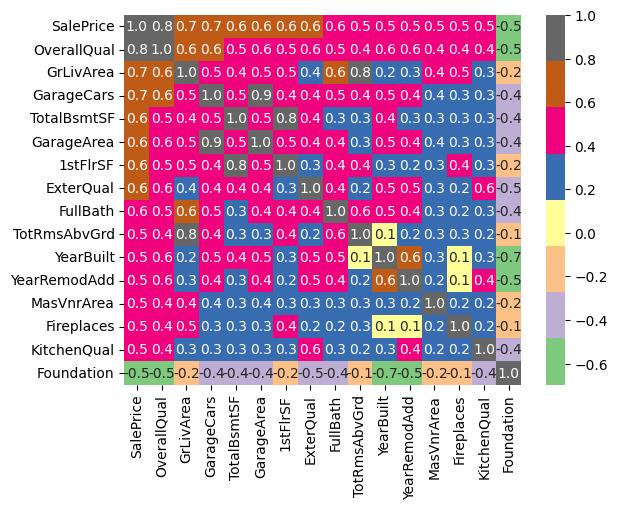

In [265]:
# 相関係数の絶対値が0.4以上だと相関関係が強い
threshold = 0.4
highscore_all = train.corr()['SalePrice'][abs(train.corr()['SalePrice']) >= threshold].sort_values(ascending=False).index
sns.heatmap(train[highscore_all].corr(), cmap='Accent', annot=True, fmt='.1f', annot_kws={'fontsize': 10})
plt.show()
# train.info()

In [315]:
# 学習データの特徴量、目的変数を取得
train_features = train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'ExterQual', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'KitchenQual', 'Foundation']].values
train_target = train['SalePrice'].values

In [274]:
# test['GarageCars']をObjectからintに変換
test['GarageCars'] = test['GarageCars'].astype(int)

In [277]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].astype(int)

In [280]:
test['GarageArea'] = test['GarageArea'].astype(int)

In [301]:
test['MasVnrArea'] = test['MasVnrArea'].astype(int)

In [286]:
# 文字列を数値化
test['ExterQual'].value_counts()

ExterQual
TA    892
Gd    491
Ex     55
Fa     21
Name: count, dtype: int64

In [289]:
test['ExterQual'] = test['ExterQual'].replace({'TA': 0, 'Gd': 1, 'Ex': 2, 'Fa': 3})
test['ExterQual'].value_counts()

ExterQual
0    892
1    491
2     55
3     21
Name: count, dtype: int64

In [308]:
# 文字列を数値化[test:KitchenQual]
test['KitchenQual'].value_counts()

KitchenQual
TA    758
Gd    565
Ex    105
Fa     31
Name: count, dtype: int64

In [309]:
test['KitchenQual'] = test['KitchenQual'].replace({'TA':0, 'Gd':1, 'Ex':2, 'Fa':3})
test['KitchenQual'].value_counts()

KitchenQual
0    758
1    565
2    105
3     31
Name: count, dtype: int64

In [312]:
# 文字列を数値化[test:Foundation]
test['Foundation'].value_counts()

Foundation
PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
Name: count, dtype: int64

In [313]:
test ['Foundation'] = test['Foundation'].replace({'PConc':0, 'CBlock':1, 'BrkTil':2, 'Slab':3, 'Stone':4, 'Wood':5})
test['Foundation'].value_counts()

Foundation
0    661
1    601
2    165
3     25
4      5
5      2
Name: count, dtype: int64

In [316]:
# テストデータの特徴量を取得
test_features = test[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'ExterQual', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'KitchenQual', 'Foundation']].values

In [318]:
# 線形回帰分析
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [319]:
# モデルの学習
model.fit(train_features, train_target)

LinearRegression()

In [320]:
# テストデータによる予測
predict_test_target = model.predict(test_features)
print(predict_test_target)

[115533.75344121 158905.87419889 164042.54653267 ... 161501.45408535
 108960.09282411 223761.59378867]


In [321]:
# 提出フォーマットに変換
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': predict_test_target})
submission.to_csv("submission_HousePrices_AdvancedRegressionTechniques_3.csv", index=False)